In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {
    'date': pd.date_range(start='2024-07-01', periods=100, freq='D'),
    'stock_price': np.random.rand(100) * 100,
    'total_sales': np.random.rand(100) * 1000,
    'num_employees': np.random.randint(50, 500, 100)
}


In [3]:
ticker = "INFY.NS"
data = yf.download(ticker, start="2024-07-01", end="2024-07-08")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-01,1559.500000,1599.900024,1559.500000,1590.800049,1590.800049,6801771
2024-07-02,1596.199951,1633.800049,1586.500000,1621.050049,1621.050049,10493173
2024-07-03,1625.000000,1636.000000,1606.000000,1627.400024,1627.400024,7269965
2024-07-04,1628.199951,1660.000000,1628.000000,1650.650024,1650.650024,8008311
2024-07-05,1651.449951,1665.849976,1633.349976,1647.449951,1647.449951,7065022


In [4]:
df = pd.DataFrame()

In [5]:
df["day1"] = data["Close"].shift(5)
df["day2"] = data["Close"].shift(4)
df["day3"] = data["Close"].shift(3)
df["day4"] = data["Close"].shift(2)
df["day5"] = data["Close"].shift(1)



In [6]:
data.dropna(inplace=True)

In [7]:
data["target"] = data["Close"]
data

,Open,High,Low,Close,Adj Close,Volume,target
Date,,,,,,,
2024-07-01,1559.500000,1599.900024,1559.500000,1590.800049,1590.800049,6801771,1590.800049
2024-07-02,1596.199951,1633.800049,1586.500000,1621.050049,1621.050049,10493173,1621.050049
2024-07-03,1625.000000,1636.000000,1606.000000,1627.400024,1627.400024,7269965,1627.400024
2024-07-04,1628.199951,1660.000000,1628.000000,1650.650024,1650.650024,8008311,1650.650024
2024-07-05,1651.449951,1665.849976,1633.349976,1647.449951,1647.449951,7065022,1647.449951


In [8]:
print(data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'target'], dtype='object')


In [9]:
X=data[["Open","High","Low","Close","Adj Close","Volume"]]
y=data["target"]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0, shuffle=False)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"mean_squared_error:",{mse})
print(f"mean_absolute_error:",{mae})

mean_squared_error: {10.135346840631456}
mean_absolute_error: {3.1836059493334687}


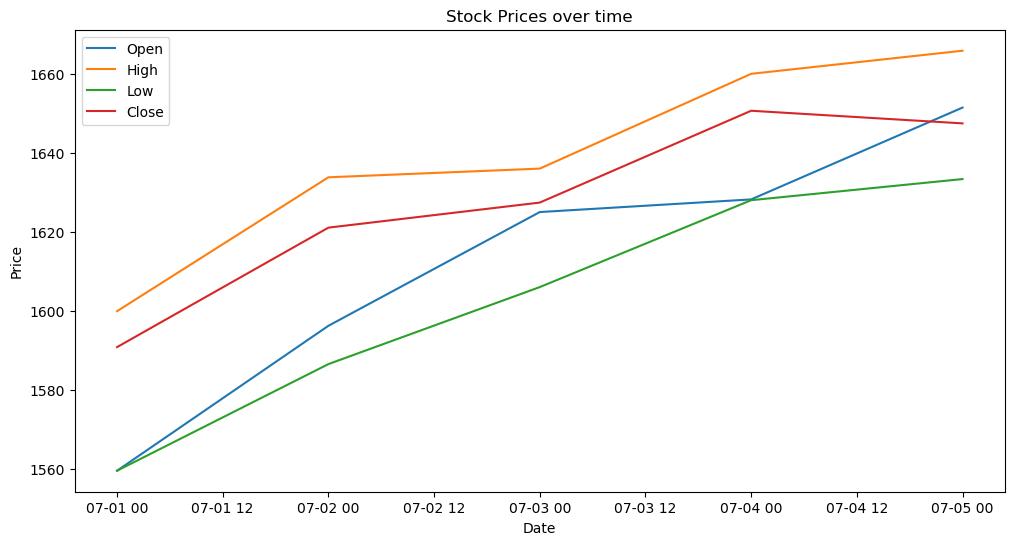

In [15]:
#Line Plot for stock prices
plt.figure(figsize=(12,6))
plt.plot(data.index, data["Open"], label="Open")
plt.plot(data.index, data["High"], label="High")
plt.plot(data.index, data["Low"], label="Low")
plt.plot(data.index, data["Close"], label="Close")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Prices over time")
plt.legend()
plt.show()

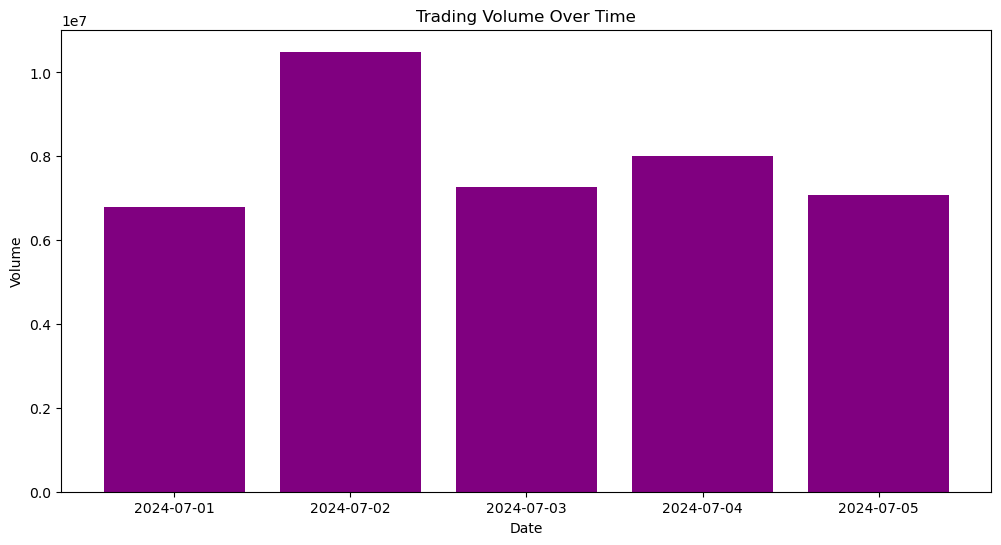

In [16]:
#Volume
plt.figure(figsize=(12,6))
plt.bar(data.index, data["Volume"], color="purple")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.title("Trading Volume Over Time")
plt.show()

In [17]:
#prepare the data for prediction
X = np.arange(len(data)).reshape(-1, 1)
y = data['Close'].values


In [18]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [19]:
next_day = np.array([[len(data)]])
predicted_price = model.predict(next_day)

In [20]:
print(f"Predicted closing price for the next day: {predicted_price[0]}")


Predicted closing price for the next day: 1670.3399536132813


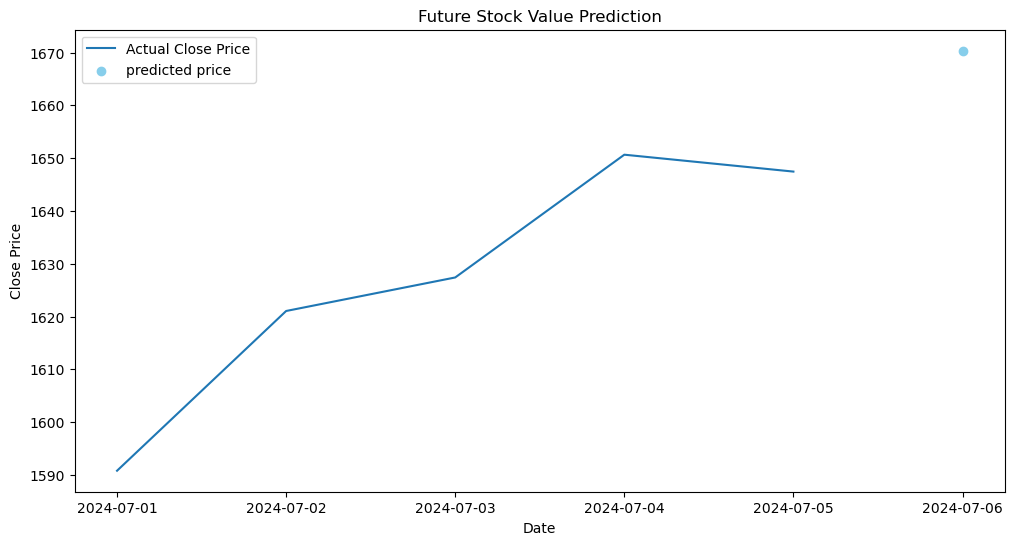

In [21]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data["Close"], label="Actual Close Price")
plt.scatter(pd.to_datetime("2024-07-06"),predicted_price, color="skyblue",label="predicted price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Future Stock Value Prediction")
plt.legend()
plt.show()